In [3]:
if __name__ == '__main__':
    import pymongo
    import pandas as pd
    import numpy as np
    import os
    import datetime
    import sys 
    import csv
    from sklearn import svm


    filename = "data.csv"
    
    df = pd.read_csv(filename)

In [4]:
    list_cols = (df.columns)
    list_cols

Index(['indicator1', 'indicator2', 'indicator3', 'indicator4', 'indicator5',
       'indicator6', 'indicator7', 'indicator8', 'indicator9', 'indicator10',
       ...
       'AskVolume2', 'AskVolume1', 'BidVolume1', 'BidVolume2', 'BidVolume3',
       'BidVolume4', 'BidVolume5', 'OpenInterest', 'UpperLimitPrice',
       'LowerLimitPrice'],
      dtype='object', length=139)

In [8]:
    midp = df.loc[:,'midPrice']
    midp
    midp.to_csv('midPrice.csv')
    
    

In [21]:
    ind = 0
    n = 1
    L = []
    ind_l = []
    for i in midp:
        if ind < n:
            old = i
            ind += 1
            continue
        ind_l.append(ind)
        l = i - old
        old = i
        L.append(l)
        ind += 1

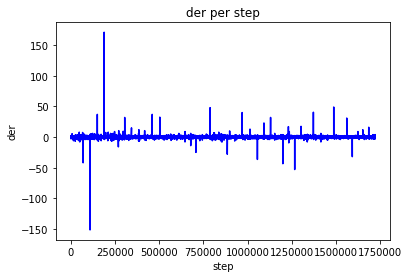

In [22]:
    import matplotlib.pyplot as plt
    plt.plot(ind_l, L, 'b-')
    plt.title('der per step')
    plt.xlabel('step')
    plt.ylabel('der')
    plt.show()

In [23]:
    dfL = pd.DataFrame(L)
    dfL.to_csv('dfL.csv')

(0.0, 1721490.0)

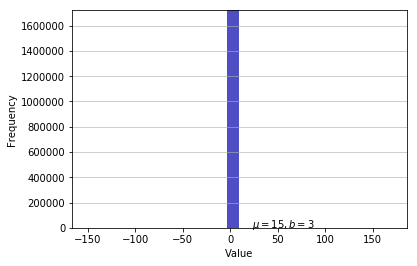

In [24]:
    n, bins, patches = plt.hist(x=L, bins='auto', color='#0504aa',
                            alpha=0.7, rwidth=0.85)
    plt.grid(axis='y', alpha=0.75)
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.text(23, 45, r'$\mu=15, b=3$')
    maxfreq = n.max()
    # 设置y轴的上限
    plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)

In [29]:
    ratio_L = []
    for i in range(len(L)):
        var = float(midp.iloc[i])
        ratio_L.append(float (L[i] / var) )
    ratio_L

[0.0,
 0.0,
 0.00017801513128615933,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 -0.00017798344753937884,
 0.0,
 0.00035603026257231867,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0001779517750689563,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.00017792011386887289,
 8.894423196655697e-05,
 0.00026680896478121667,
 0.0,
 -0.00026673779674579886,
 8.893632159373888e-05,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 -0.0001778568252556692,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.00017788846393311395,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 8.89284126278346e-05,
 -8.892050506846879e-05,
 0.0,
 0.0,
 8.89284126278346e-05,
 8.892050506846879e-05,
 0.0,
 0.0,
 0.0,
 -0.00017782519783053258,
 0.0,
 0.0,
 0.0001778568252556692,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 -0.00017782519783053258,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.

In [32]:
    ratio_L_df = pd.DataFrame(ratio_L)
    ratio_L_df[0].value_counts()
    ratio_L_df.to_csv('ratio_L.csv')

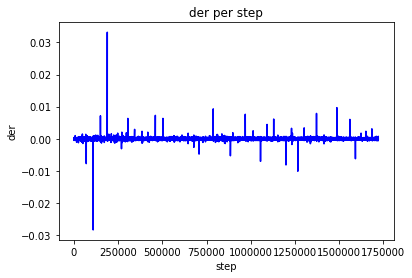

In [33]:
    plt.plot(ind_l, ratio_L, 'b-')
    plt.title('der per step')
    plt.xlabel('step')
    plt.ylabel('der')
    plt.show()